## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [4]:
print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [8]:
print(type(boston.data)) # data (x)
print(type(boston.target)) # price data (y)
data = np.column_stack((boston.data, boston.target)) # Merge two arrays into one
print(type(data)) # Make sure its an array
feature = np.hstack((boston.feature_names, "Price")) # Feature/colmuns of data

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
df = pd.DataFrame(data = data, columns = feature) # Creating DataFrame 

## Q2: Print the head rows of the dataframe.

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

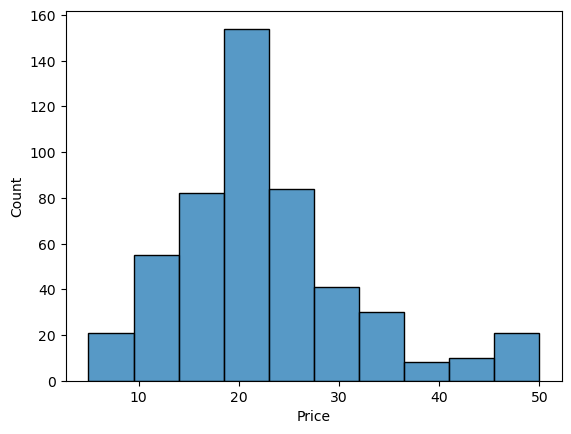

In [11]:
sns.histplot(df["Price"], bins = 10);

## Q4: Use a heatmap to show the correlation between features and the target labels.

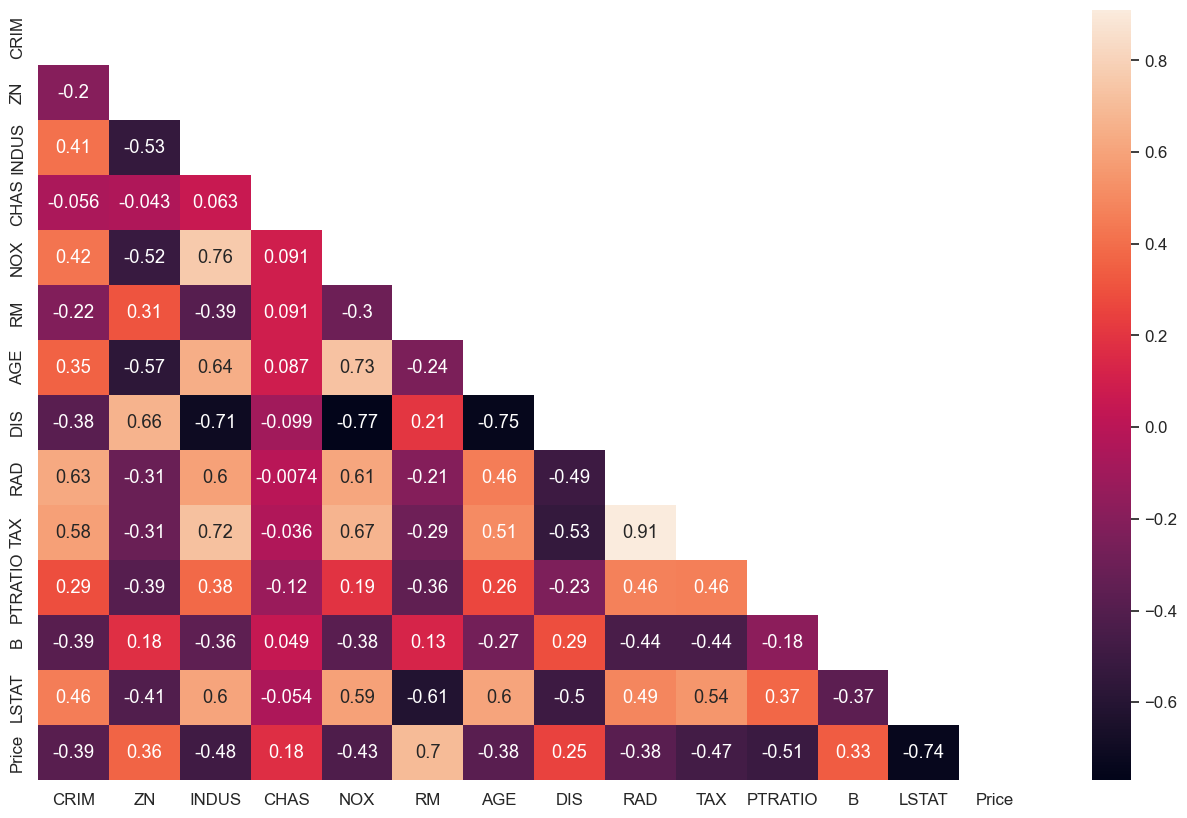

In [12]:
plt.figure(figsize = (16, 10))
sns.set(font_scale = 1.1,
       style = "white")

mask = np.zeros_like(df.corr()) # Array of zeros
mask[np.triu_indices_from(mask)] = True # change upper triangle to ones

sns.heatmap(df.corr(),
            annot = True,
            mask = mask); # applying mask to be more standable

## Q5: Use a lmplot to draw the relations between price and LSTAT.

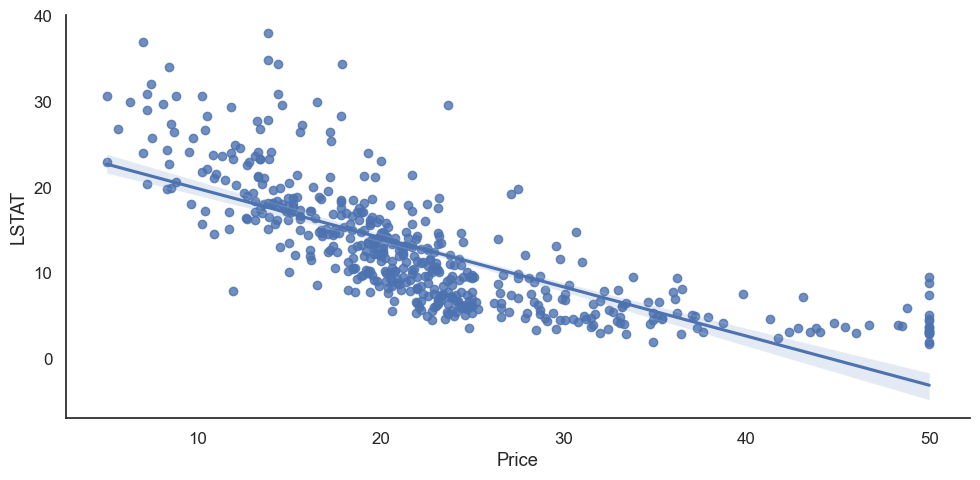

In [13]:
sns.lmplot(data = df, x = "Price", y = "LSTAT", aspect = 2);

## Q6: Use a lmplot to draw the relations between price and RM.

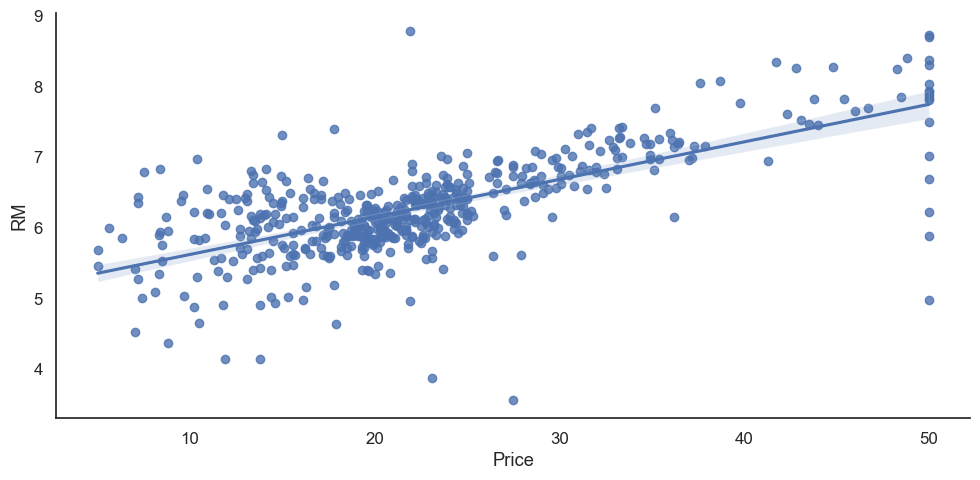

In [15]:
sns.lmplot(data = df, x = "Price", y = "RM", aspect = 2);

In [16]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [17]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [18]:
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


## Q8: Build a Linear Regression Model.

In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
model = LinearRegression()


## Q9: Train the Model.

In [24]:
model.fit(X_train, y_train)


LinearRegression()

In [25]:
model = LinearRegression().fit(X_train, y_train)

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [26]:
model.intercept_

37.937107741833316

In [34]:
coef_dataframe = pd.DataFrame(model.coef_, X.columns, #boston.feature_names,
                            columns = ["Coefficient"])
coef_dataframe

,Coefficient
CRIM,-0.121310
ZN,0.044466
INDUS,0.011342
CHAS,2.511246
NOX,-16.231253
RM,3.859068
AGE,-0.009985
DIS,-1.500270
RAD,0.242143
TAX,-0.011072


In [28]:
pred = model.predict(X_test)
pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [29]:
rel = np.array(list(y_test))
rel

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5,
       13.6, 17.4,  8.4, 35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2,
       25. , 24.1, 16.6, 32.9, 36.2, 11. ,  7.2, 22

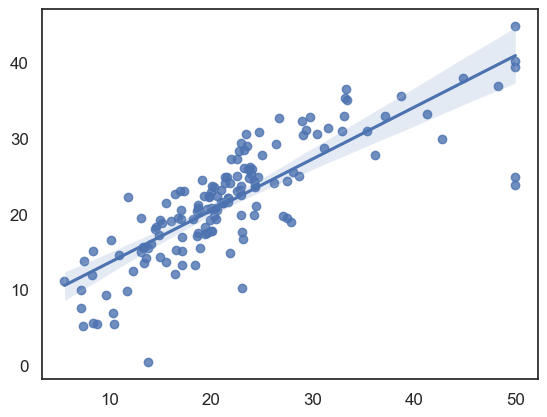

In [30]:
sns.regplot(x= rel, y= pred);

## Residual Histogram

<AxesSubplot:xlabel='Price', ylabel='Density'>

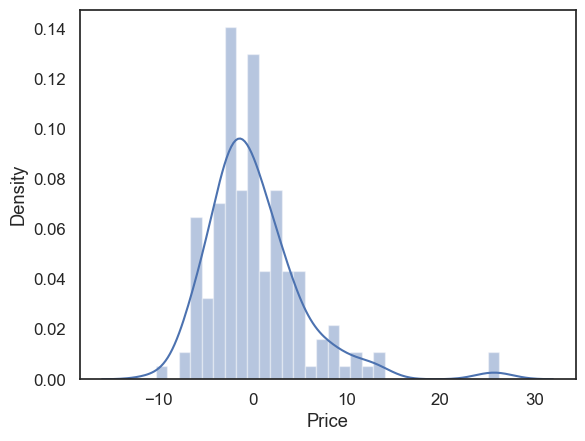

In [31]:
sns.distplot((y_test - pred), bins = 30)

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [32]:
import sklearn.metrics as mm

In [33]:
print("MAE: ", mm.mean_absolute_error(y_test, pred))
print("MSE: ", mm.mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mm.mean_squared_error(y_test, pred)))
print("R^2: ", mm.r2_score(rel, pred))

MAE:  3.6099040603818233
MSE:  27.195965766883365
RMSE:  5.214975145375418
R^2:  0.6733825506400176
